# Comparison
This Demonstration compares performance of reinforcement learning models across seperate seperate tasks. 

* In every task objective is to go to the goal location as quickly as possible
* Agent learns reward functions and a mapping function for each task. A mapping function is a relationship
between primitive actions and cardinal movements (N, S, E, W), and is learned in place of a transition function. We assume an agent knowns cardinal movements
* Each task is associated with a "context" and the state of the agent can be defined formally as a tuple of it's location in space and it's context:  
s = (x, y, c)
* Task Set Agent: Assumes contexts can be clustered together and clusters share both 1) Reward function and 2) Mapping
* Independent Clustering Agent: Assumes Reward functions and Mappings can be clustered indpendendly of each other based on their contexts

In [1]:
%matplotlib inline
import copy
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from Agents import Task, TaskSetAgent, IndependentClusterAgent, FlatAgent
from utils import randomize_order, make_task

The first set of simulations are on a set of 6x6 gridworlds. There are six contexts with
a total of 4 goal locations and 2 mappings. None of the contexts share a goal and a mapping,
but generalization is still possible between them.


In [2]:
# define all of the task parameters
grid_world_size = (6, 6)

# define mapping between primitive action (a in [0, 1]) and cardinal movements
# (left, right, up down)
map_0 = {0: u'left', 1: u'up', 2: u'down', 3: u'right'}
map_1 = {4: u'up', 5: u'left', 6: u'right', 7: u'down'}
# define the mappings for each context, where the ith mapping belongs the ith context
context_maps = [map_0, map_0, map_0, map_0, map_1, map_1]

# define goal locations 
goal_0 = (0, 0)
goal_1 = (0, 5)
goal_2 = (5, 0)
goal_3 = (5, 5)
# define the goal location for each context, where the ith goal belongs the ith context
context_goals = [goal_0, goal_1, goal_2, goal_3, goal_0, goal_3]

start_locations = [(x, y) for x in range(grid_world_size[0]) for y in range(grid_world_size[1])]
for g in set(context_goals):
    start_locations.remove(g)

context_balance = [2, 2, 6, 6, 4, 4]

hazard_rates = [0.5, 0.67, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

list_goal_priors = [(0, 0), (0, 5), (5, 0), (5, 5)]

task_kwargs = dict(
    context_balance=context_balance,
    context_goals=context_goals,
    context_maps=context_maps,
    hazard_rates=hazard_rates,
    start_locations=start_locations,
    grid_world_size=grid_world_size,
    list_goal_priors=list_goal_priors
)


# Define a function to Simluate the Models:
def simulate(agent_class, simulation_number, task_kwargs, agent_kwargs=None):
    _kwargs = copy.copy(task_kwargs)
    del _kwargs['list_goal_priors']
    task = make_task(**_kwargs)
    if agent_kwargs is not None:
        agent = agent_class(task, **agent_kwargs)
    else:
        agent = agent_class(task)
    agent.set_reward_prior(task_kwargs['list_goal_priors'])

    results = agent.generate()
    results['Simulation Number'] = [simulation_number] * len(results)
    results['Cumulative Steps Taken'] = results['n actions taken'].cumsum()

    return results

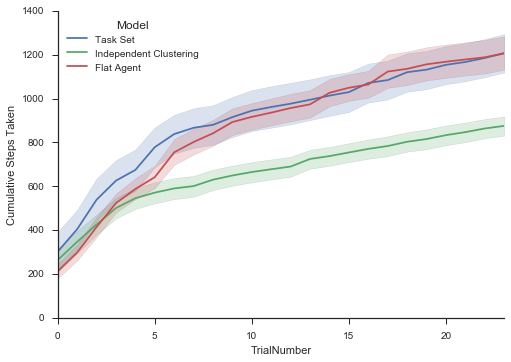

In [3]:
n_sim = 25

resultsTS = pd.concat([simulate(TaskSetAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsIC = pd.concat([simulate(IndependentClusterAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsFL = pd.concat([simulate(FlatAgent, ii, task_kwargs) for ii in range(n_sim)])

resultsTS['Model'] = ['Task Set'] * len(resultsTS)
resultsIC['Model'] = ['Independent Clustering'] * len(resultsIC)
resultsFL['Model'] = ['Flat Agent'] * len(resultsFL)
results = pd.concat([resultsTS, resultsIC, resultsFL])


# define the parameters to plot the results
tsplot_kwargs = dict(
    time='TrialNumber',
    value='Cumulative Steps Taken',
    data=results[results['In goal']], 
    unit='Simulation Number',
    condition='Model',
)

with sns.axes_style('ticks'):
    sns.tsplot(**tsplot_kwargs)
    sns.despine()

We can also define other task enviornments. Here, we define the same task but on a gridworld with 3x5 grid 

In [8]:
# define all of the task parameters here
grid_world_size = (3, 5)

map_0 = {0: u'left', 1: u'up', 2: u'down', 3: u'right'}
map_1 = {4: u'up', 5: u'left', 6: u'right', 7: u'down'}

goal_0 = (0, 0)
goal_1 = (0, 4)
goal_2 = (2, 0)
goal_3 = (2, 4)
context_goals = [goal_0, goal_1, goal_2, goal_3, goal_0, goal_3]

start_locations = [(x, y) for x in range(grid_world_size[0]) for y in range(grid_world_size[1])]
for g in set(context_goals):
    start_locations.remove(g)

context_maps = [map_0, map_0, map_0, map_0, map_1, map_1]
context_balance = [2, 2, 6, 6, 4, 4]

hazard_rates = [0.5, 0.67, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

list_goal_priors = [(0, 0), (0, 4), (2, 0), (2, 4)]

task_kwargs = dict(
    context_balance=context_balance,
    context_goals=context_goals,
    context_maps=context_maps,
    hazard_rates=hazard_rates,
    start_locations=start_locations,
    grid_world_size=grid_world_size,
    list_goal_priors=list_goal_priors
)

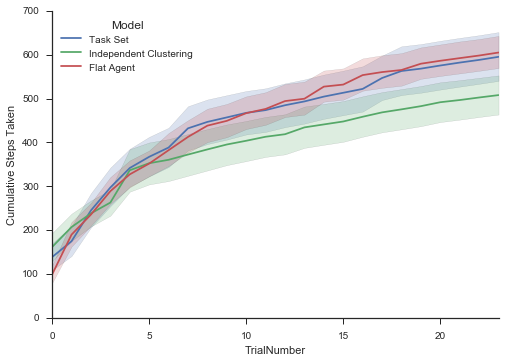

In [9]:
n_sim = 25

resultsTS = pd.concat([simulate(TaskSetAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsIC = pd.concat([simulate(IndependentClusterAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsFL = pd.concat([simulate(FlatAgent, ii, task_kwargs) for ii in range(n_sim)])

resultsTS['Model'] = ['Task Set'] * len(resultsTS)
resultsIC['Model'] = ['Independent Clustering'] * len(resultsIC)
resultsFL['Model'] = ['Flat Agent'] * len(resultsFL)
results = pd.concat([resultsTS, resultsIC, resultsFL])

tsplot_kwargs['data'] = results[results['In goal']]
with sns.axes_style('ticks'):
    sns.tsplot(**tsplot_kwargs)
    sns.despine()

Here, we show a task where it is useful to generalize contexts as a whole. In this task, indpendent clustering does roughly the same as joint clustering.

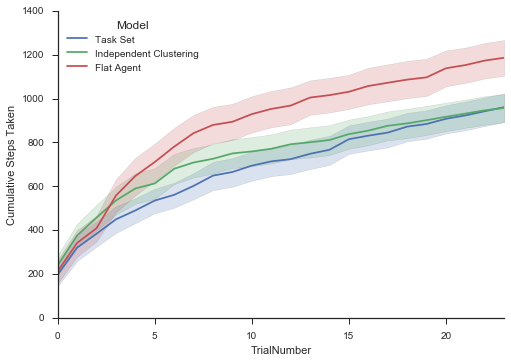

In [10]:
# define all of the task parameters
grid_world_size = (6, 6)

# define mapping between primitive action (a in [0, 1]) and cardinal movements
# (left, right, up down)
map_0 = {0: u'left', 1: u'up', 2: u'down', 3: u'right'}
map_1 = {4: u'up', 5: u'left', 6: u'right', 7: u'down'}
# define the mappings for each context, where the ith mapping belongs the ith context
context_maps = [map_0, map_0, map_0, map_0, map_1, map_1]

# define goal locations 
goal_0 = (0, 0)
goal_1 = (0, 5)
goal_2 = (5, 0)
goal_3 = (5, 5)
# define the goal location for each context, where the ith goal belongs the ith context
context_goals = [goal_0, goal_1, goal_2, goal_0, goal_3, goal_3]

start_locations = [(x, y) for x in range(grid_world_size[0]) for y in range(grid_world_size[1])]
for g in set(context_goals):
    start_locations.remove(g)

context_balance = [2, 2, 6, 6, 4, 4]

hazard_rates = [0.5, 0.67, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

list_goal_priors = [(0, 0), (0, 5), (5, 0), (5, 5)]

task_kwargs = dict(
    context_balance=context_balance,
    context_goals=context_goals,
    context_maps=context_maps,
    hazard_rates=hazard_rates,
    start_locations=start_locations,
    grid_world_size=grid_world_size,
    list_goal_priors=list_goal_priors
)

n_sim = 25

resultsTS = pd.concat([simulate(TaskSetAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsIC = pd.concat([simulate(IndependentClusterAgent, ii, task_kwargs) for ii in range(n_sim)])
resultsFL = pd.concat([simulate(FlatAgent, ii, task_kwargs) for ii in range(n_sim)])

resultsTS['Model'] = ['Task Set'] * len(resultsTS)
resultsIC['Model'] = ['Independent Clustering'] * len(resultsIC)
resultsFL['Model'] = ['Flat Agent'] * len(resultsFL)
results = pd.concat([resultsTS, resultsIC, resultsFL])

tsplot_kwargs['data'] = results[results['In goal']]
with sns.axes_style('ticks'):
    sns.tsplot(**tsplot_kwargs)
    sns.despine()